In [ ]:
## Mounting Google Drive
from google.colab import drive, files
drive.mount('/content/drive')
from __future__ import absolute_import, print_function,division, unicode_literals
import os.path
import glob
import shutil

import tensorflow as tf
assert tf.__version__.startswith('2')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dropout,Dense,Activation
from keras import regularizers
import keras

import numpy as np
import matplotlib.pyplot as plt
import pathlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
BATCH_SIZE = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
data_dir ="/content/drive/MyDrive/rfirst"
data_dir = pathlib.Path(data_dir)

CLASS_NAMES = np.array(['Bacterial leaf blight test','Brown Spot test','Leaf Smut test'])

print('Class Names: ', CLASS_NAMES)

Class Names:  ['Bacterial leaf blight test' 'Brown Spot test' 'Leaf Smut test']


In [ ]:
train_path = '/content/drive/MyDrive/rfirst/train'
test_path = '/content/drive/MyDrive/rfirst/test'

In [ ]:
import zipfile as zp

with zp.ZipFile("/content/drive/MyDrive/ricefirst.zip",'w') as myzip:
    myzip.write(r"/content/drive/MyDrive/ricefirst.zip")

In [ ]:
from keras.preprocessing import image

In [ ]:
train_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_train_gen = ImageDataGenerator(rescale=1./255,
                                     zoom_range=0.50,
                                     rotation_range=45,
                                     horizontal_flip=True,
                                     width_shift_range=0.15,
                                     height_shift_range=0.15)

train_data_gen = image_train_gen.flow_from_directory('/content/drive/MyDrive/rfirst/train',
                                                     shuffle=True,
                                                     batch_size=10,
                                                     target_size=(224,224),
                                                     class_mode='sparse')


Found 265 images belonging to 3 classes.


In [ ]:
image_test_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = image_test_gen.flow_from_directory('/content/drive/MyDrive/rfirst/test',
                                               batch_size=10,
                                               target_size=(224,224),
                                               class_mode='sparse')

Found 120 images belonging to 3 classes.


In [ ]:
def plotImages(image_arr):
    fig,axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

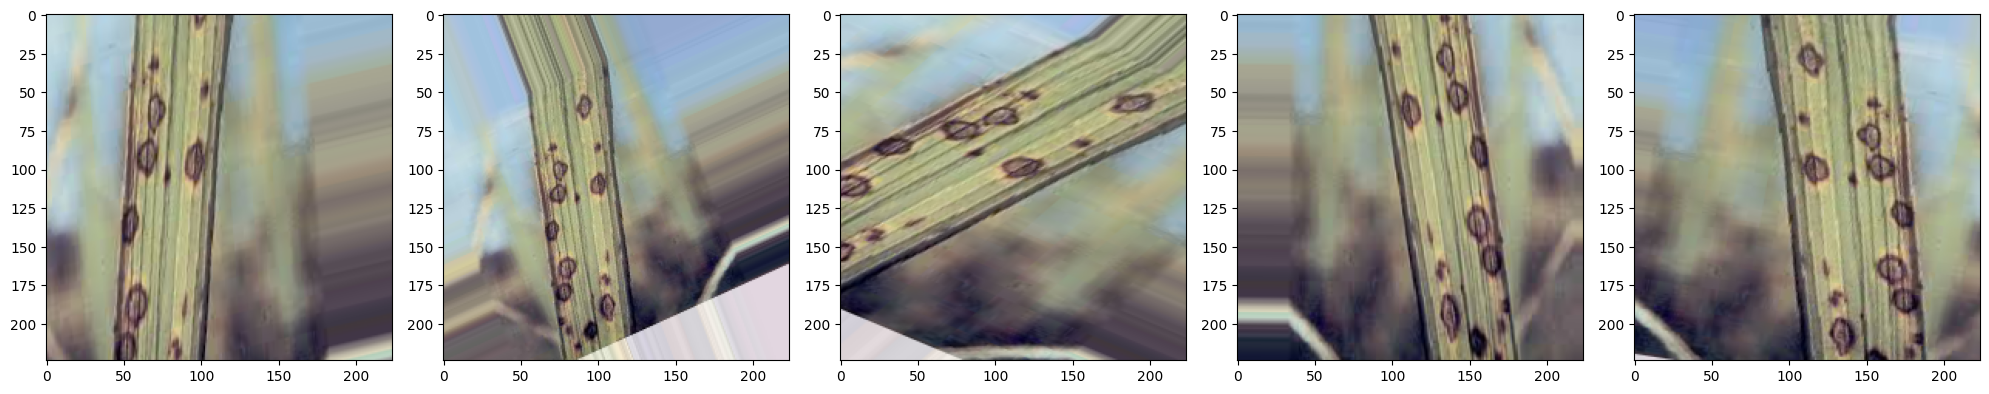

In [ ]:
img_array = [train_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

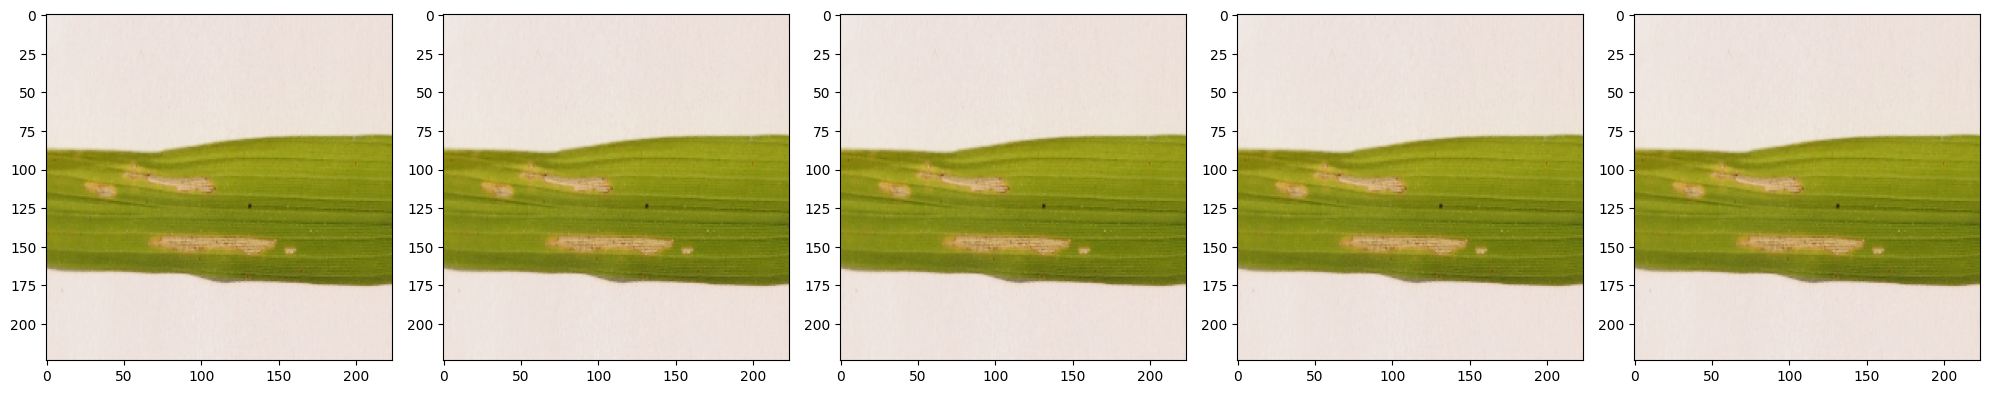

In [ ]:
img_array  = [test_data_gen[0][0][0] for i in range(5)]
plotImages(img_array)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
## VGG 16

datagen = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest", validation_split=0.3)


train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/rfirst',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='training')

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/rfirst',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='validation')

Found 270 images belonging to 2 classes.
Found 115 images belonging to 2 classes.


In [ ]:
def extract_features(trainorval, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count, 4))
    if trainorval=="training":
        generator = train_generator
    else:
        generator = test_generator
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base16.predict(preprocess_input(inputs_batch))
        try:
            features[i * 10 : (i + 1) * 10] = features_batch
            labels[i * 10: (i + 1) * 10] = labels_batch
        except ValueError:
            break
        if i==0:
            print("one down")
        i += 1
        if i * 10 >= sample_count:
            break
    return features, labels

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

conv_base16 = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
train_features, train_labels = extract_features('training', 114)
test_features, test_labels = extract_features('testing', 91)

train_features = np.reshape(train_features, (114, 7 * 7 * 512))
test_features = np.reshape(test_features, (91, 7 * 7 * 512))

1/1 [==============================] - 5s 5s/step


In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  #Removing 50% of the weights!
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import Adam

intial_learning_rate = 1e-3
EPOCHS = 20

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

from keras.callbacks import ReduceLROnPlateau

history2 = model.fit(test_features,test_labels,
                    epochs=20,
                    batch_size=10,
                    callbacks=[ReduceLROnPlateau(monitor='test_loss', factor=0.3,patience=3, min_lr=0.000001)],shuffle=True)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 6.2713e-06 - accuracy: 0.2857

10/10 [==============================] - 2s 73ms/step - loss: 6.2713e-06 - accuracy: 0.2857 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 4.0446e-06 - accuracy: 0.0989

10/10 [==============================] - 1s 66ms/step - loss: 4.0446e-06 - accuracy: 0.0989 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 2.6573e-06 - accuracy: 0.2088

10/10 [==============================] - 1s 92ms/step - loss: 2.6573e-06 - accuracy: 0.2088 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 1.4046e-06 - accuracy: 0.1978

10/10 [==============================] - 1s 70ms/step - loss: 1.4046e-06 - accuracy: 0.1978 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - ETA: 0s - loss: 2.0550e-06 - accuracy: 0.2088

10/10 [==============================] - 1s 65ms/step - loss: 2.0550e-06 - accuracy: 0.2088 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 5.8963e-07 - accuracy: 0.1978

10/10 [==============================] - 1s 66ms/step - loss: 5.8963e-07 - accuracy: 0.1978 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 8.8257e-07 - accuracy: 0.3187

10/10 [==============================] - 1s 67ms/step - loss: 8.8257e-07 - accuracy: 0.3187 - lr: 0.0010
Epoch 8/20
10/10 [==============================] - ETA: 0s - loss: 1.6791e-06 - accuracy: 0.2418

10/10 [==============================] - 1s 66ms/step - loss: 1.6791e-06 - accuracy: 0.2418 - lr: 0.0010
Epoch 9/20
10/10 [==============================] - ETA: 0s - loss: 1.1580e-06 - accuracy: 0.2857

10/10 [==============================] - 1s 66ms/step - loss: 1.1580e-06 - accuracy: 0.2857 - lr: 0.0010
Epoch 10/20
10/10 [==============================] - ETA: 0s - loss: 4.0767e-07 - accuracy: 0.1868

10/10 [==============================] - 1s 65ms/step - loss: 4.0767e-07 - accuracy: 0.1868 - lr: 0.0010
Epoch 11/20
10/10 [==============================] - ETA: 0s - loss: 1.5730e-07 - accuracy: 0.2857

10/10 [==============================] - 1s 66ms/step - loss: 1.5730e-07 - accuracy: 0.2857 - lr: 0.0010
Epoch 12/20
10/10 [==============================] - ETA: 0s - loss: 2.9961e-07 - accuracy: 0.4066

10/10 [==============================] - 1s 86ms/step - loss: 2.9961e-07 - accuracy: 0.4066 - lr: 0.0010
Epoch 13/20
10/10 [==============================] - ETA: 0s - loss: 1.9129e-07 - accuracy: 0.2967

10/10 [==============================] - 1s 118ms/step - loss: 1.9129e-07 - accuracy: 0.2967 - lr: 0.0010
Epoch 14/20
10/10 [==============================] - ETA: 0s - loss: 8.0559e-07 - accuracy: 0.2308

10/10 [==============================] - 1s 88ms/step - loss: 8.0559e-07 - accuracy: 0.2308 - lr: 0.0010
Epoch 15/20
10/10 [==============================] - ETA: 0s - loss: 1.5641e-07 - accuracy: 0.2418

10/10 [==============================] - 1s 88ms/step - loss: 1.5641e-07 - accuracy: 0.2418 - lr: 0.0010
Epoch 16/20
10/10 [==============================] - ETA: 0s - loss: 1.9432e-07 - accuracy: 0.1978

10/10 [==============================] - 1s 110ms/step - loss: 1.9432e-07 - accuracy: 0.1978 - lr: 0.0010
Epoch 17/20
10/10 [==============================] - ETA: 0s - loss: 2.0475e-07 - accuracy: 0.2857

10/10 [==============================] - 1s 69ms/step - loss: 2.0475e-07 - accuracy: 0.2857 - lr: 0.0010
Epoch 18/20
10/10 [==============================] - ETA: 0s - loss: 1.2387e-07 - accuracy: 0.1868

10/10 [==============================] - 1s 69ms/step - loss: 1.2387e-07 - accuracy: 0.1868 - lr: 0.0010
Epoch 19/20
10/10 [==============================] - ETA: 0s - loss: 2.2810e-07 - accuracy: 0.2527

10/10 [==============================] - 1s 66ms/step - loss: 2.2810e-07 - accuracy: 0.2527 - lr: 0.0010
Epoch 20/20
10/10 [==============================] - ETA: 0s - loss: 2.1067e-07 - accuracy: 0.2527

10/10 [==============================] - 1s 66ms/step - loss: 2.1067e-07 - accuracy: 0.2527 - lr: 0.0010


In [ ]:
scores=model.evaluate(test_features,test_labels)
scores

3/3 [==============================] - 0s 34ms/step - loss: 8.1801e-10 - accuracy: 0.9451


[8.180137123225961e-10, 0.9450549483299255]

In [ ]:
acc2=history2.history['accuracy']
loss2=history2.history['loss']


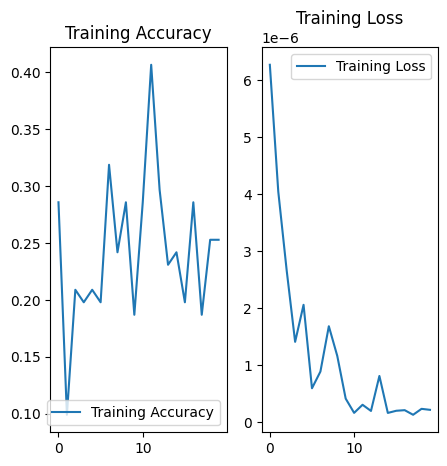

In [ ]:
epochs_range = range(20)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc2,label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss2,label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
#VGG19
datagen = ImageDataGenerator(
    rotation_range=30, width_shift_range=0.15,
    height_shift_range=0.15, shear_range=0.15,
    zoom_range=0.2,horizontal_flip=True,
    fill_mode="nearest", validation_split=0.3)


train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/rfirst/train',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='training')

test_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/rfirst/test',
    target_size=(224, 224),
    batch_size=10,
    class_mode='categorical',
    subset='validation')

Found 187 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [ ]:
def extract_features19(trainorval, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 512))
    labels = np.zeros(shape=(sample_count, 4))
    if trainorval=="training":
        generator = train_generator
    else:
        generator = test_generator
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base19.predict(preprocess_input(inputs_batch))
        try:
            features[i * 10 : (i + 1) * 10] = features_batch
            labels[i * 10 : (i + 1) * 10] = labels_batch
        except ValueError:
            break
        if i==0:
            print("one down")
        i += 1
        if i * 10 >= sample_count:
            break
    return features, labels




In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

conv_base19 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [ ]:
train_features19, train_labels19 = extract_features19('training', 114)
test_features19, test_labels19 = extract_features19('training', 91)

train_features19 = np.reshape(train_features19, (114, 7 * 7 * 512))
test_features19 = np.reshape(test_features19, (91, 7 * 7 * 512))


1/1 [==============================] - 7s 7s/step


In [ ]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  #Removing 50% of the weights!
model.add(layers.Dense(4, activation='softmax'))


In [ ]:
from tensorflow.keras.optimizers import Adam

intial_learning_rate = 1e-3
EPOCHS = 20

model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

from keras.callbacks import ReduceLROnPlateau

history = model.fit(test_features19,test_labels19,
                    epochs=20,
                    batch_size=10,
                    callbacks=[ReduceLROnPlateau(monitor='test_loss', factor=0.3,patience=3, min_lr=0.000001)],shuffle=True)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 4.8110e-05 - accuracy: 0.5604

10/10 [==============================] - 2s 94ms/step - loss: 4.8110e-05 - accuracy: 0.5604 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 4.4068e-05 - accuracy: 0.5275

10/10 [==============================] - 1s 68ms/step - loss: 4.4068e-05 - accuracy: 0.5275 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 1.3398e-05 - accuracy: 0.6154

10/10 [==============================] - 1s 67ms/step - loss: 1.3398e-05 - accuracy: 0.6154 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 1.3701e-05 - accuracy: 0.5934

10/10 [==============================] - 1s 66ms/step - loss: 1.3701e-05 - accuracy: 0.5934 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - ETA: 0s - loss: 2.8763e-06 - accuracy: 0.5165

10/10 [==============================] - 1s 69ms/step - loss: 2.8763e-06 - accuracy: 0.5165 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - ETA: 0s - loss: 2.1798e-06 - accuracy: 0.5604

10/10 [==============================] - 1s 83ms/step - loss: 2.1798e-06 - accuracy: 0.5604 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - ETA: 0s - loss: 2.1396e-06 - accuracy: 0.4615

10/10 [==============================] - 1s 82ms/step - loss: 2.1396e-06 - accuracy: 0.4615 - lr: 0.0010
Epoch 8/20
10/10 [==============================] - ETA: 0s - loss: 1.4306e-06 - accuracy: 0.5495

10/10 [==============================] - 1s 65ms/step - loss: 1.4306e-06 - accuracy: 0.5495 - lr: 0.0010
Epoch 9/20
10/10 [==============================] - ETA: 0s - loss: 3.8629e-06 - accuracy: 0.5275

10/10 [==============================] - 1s 67ms/step - loss: 3.8629e-06 - accuracy: 0.5275 - lr: 0.0010
Epoch 10/20
10/10 [==============================] - ETA: 0s - loss: 2.3744e-06 - accuracy: 0.4176

10/10 [==============================] - 1s 68ms/step - loss: 2.3744e-06 - accuracy: 0.4176 - lr: 0.0010
Epoch 11/20
10/10 [==============================] - ETA: 0s - loss: 7.3551e-07 - accuracy: 0.5714

10/10 [==============================] - 1s 66ms/step - loss: 7.3551e-07 - accuracy: 0.5714 - lr: 0.0010
Epoch 12/20
10/10 [==============================] - ETA: 0s - loss: 4.6478e-07 - accuracy: 0.4505

10/10 [==============================] - 1s 95ms/step - loss: 4.6478e-07 - accuracy: 0.4505 - lr: 0.0010
Epoch 13/20
10/10 [==============================] - ETA: 0s - loss: 6.0270e-07 - accuracy: 0.5275

10/10 [==============================] - 1s 87ms/step - loss: 6.0270e-07 - accuracy: 0.5275 - lr: 0.0010
Epoch 14/20
10/10 [==============================] - ETA: 0s - loss: 8.7536e-07 - accuracy: 0.4835

10/10 [==============================] - 1s 85ms/step - loss: 8.7536e-07 - accuracy: 0.4835 - lr: 0.0010
Epoch 15/20
10/10 [==============================] - ETA: 0s - loss: 1.9911e-06 - accuracy: 0.5275

10/10 [==============================] - 1s 87ms/step - loss: 1.9911e-06 - accuracy: 0.5275 - lr: 0.0010
Epoch 16/20
10/10 [==============================] - ETA: 0s - loss: 1.6462e-06 - accuracy: 0.5495

10/10 [==============================] - 1s 92ms/step - loss: 1.6462e-06 - accuracy: 0.5495 - lr: 0.0010
Epoch 17/20
10/10 [==============================] - ETA: 0s - loss: 7.4775e-07 - accuracy: 0.4286

10/10 [==============================] - 1s 107ms/step - loss: 7.4775e-07 - accuracy: 0.4286 - lr: 0.0010
Epoch 18/20
10/10 [==============================] - ETA: 0s - loss: 9.6238e-06 - accuracy: 0.5165

10/10 [==============================] - 1s 85ms/step - loss: 9.6238e-06 - accuracy: 0.5165 - lr: 0.0010
Epoch 19/20
10/10 [==============================] - ETA: 0s - loss: 1.0091e-06 - accuracy: 0.4176

10/10 [==============================] - 1s 78ms/step - loss: 1.0091e-06 - accuracy: 0.4176 - lr: 0.0010
Epoch 20/20
10/10 [==============================] - ETA: 0s - loss: 4.5550e-07 - accuracy: 0.4835

10/10 [==============================] - 1s 68ms/step - loss: 4.5550e-07 - accuracy: 0.4835 - lr: 0.0010


In [ ]:
scores=model.evaluate(test_features19,test_labels19)
scores

3/3 [==============================] - 0s 17ms/step - loss: 4.8218e-09 - accuracy: 0.9890


[4.8218122827847765e-09, 0.9890109896659851]

In [ ]:
acc=history.history['accuracy']
loss=history.history['loss']

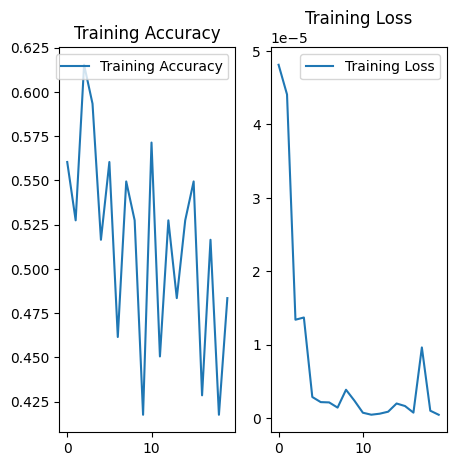

In [ ]:
epochs_range = range(20)

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.legend(loc='upper right')
plt.title('Training Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Classification Report: \n", classification_report(test_labels19,test_labels19))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         0
   macro avg       0.00      0.00      0.00         0
weighted avg       0.00      0.00      0.00         0
 samples avg       0.00      0.00      0.00         0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: